In [1]:
#
# Choose the layer to test
#
#LAYER = 'depthwise_conv2d' # 
#LAYER = 'pointwise_conv2d'
LAYER = 'separable_conv2d' # uses both depthwise and pointwise

RUN_HLS = True
IO_TYPE = 'io_parallel'
STRATEGY = 'Latency'
BACKEND = 'Vivado'

H = 10    # Input height
W = 10    # Input width
Din = 3  # Input # of channels
Fh = 3   # Kernel height
Fw = 3   # Kernel width
Dout = 3 # Kernel # of filters

B = 1   # Test set batch size

FXD_W = 12 # Fixed-point precision, word bit width
FXD_I = 11 # Fixed-point precision, integer-part bit width

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten

from tensorflow.keras.models import Sequential

from qkeras import *

2024-04-16 16:24:43.107740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import os

In [4]:
#os.environ['PATH'] = '/home/xilinx/Vivado/2019.1/bin:' + os.environ['PATH'] 

In [5]:
os.environ['PATH'] = '/data/software/xilinx/Vivado/2020.1/bin:' + os.environ['PATH'] #Mulder

In [6]:
LAYER

'separable_conv2d'

kmodel...

In [7]:
def CreateKerasModel(layer, input_shape, kernel_size, filters):
 
    x_in = Input(input_shape, name='input_1')
    if layer == 'depthwise_conv2d':
        x = DepthwiseConv2D(
            kernel_size=kernel_size,
            use_bias=False,
            depthwise_initializer=tf.keras.initializers.Ones(), # makes debugging easy
            bias_initializer=tf.keras.initializers.Zeros(), # makes debugging easy
            name='depthwise_conv2d'
        )(x_in)
    elif layer == 'pointwise_conv2d':
        x_out = Conv2D(
            filters=filters,
            kernel_size=(1,1),
            use_bias=False,
            kernel_initializer=tf.keras.initializers.Ones(), # makes debugging easy
            bias_initializer=tf.keras.initializers.Zeros(), # makes debugging easy
            name='pointwise_conv2d'
        )(x_in)
    else:
        x= SeparableConv2D(
            filters=filters,
            kernel_size=kernel_size,
            use_bias=False,
            depthwise_initializer=tf.keras.initializers.Ones(), # makes debugging easy
            pointwise_initializer=tf.keras.initializers.Ones(), # makes debugging easy
            name = 'separable_conv2d'
    )(x_in)
    x = Flatten()(x)
    x_out = Dense(10)(x)
    kmodel = Model(inputs=x_in, outputs=x_out)
    return kmodel

In [8]:
kmodel = CreateKerasModel(LAYER, input_shape=(H,W,Din), kernel_size=(Fh, Fw), filters=Dout)
kmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 10, 3)]       0         
                                                                 
 separable_conv2d (Separable  (None, 8, 8, 3)          36        
 Conv2D)                                                         
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 10)                1930      
                                                                 
Total params: 1,966
Trainable params: 1,966
Non-trainable params: 0
_________________________________________________________________


2024-04-16 16:25:24.500730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
X_train = np.random.rand(10,10,10,3)  # 1000 samples with 10 features
y_train = np.random.randint(2, size=(10,))

In [10]:
X = np.random.rand(1000, 10)  # 1000 samples with 10 features
Y = np.random.randint(2, size=(1000,))  # Binary labels (0 or 1)


In [ ]:
import tensorflow

In [13]:
kmodel.compile(loss="binary_crossentropy", optimizer=tensorflow.keras.optimizers.Adam(
    learning_rate=0.001), metrics=["binary_accuracy"])


In [14]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=100)

In [15]:
history=kmodel.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=50,
    verbose=2,
    #sample_weight=np.asarray(weights),
    validation_split=0.20,
    callbacks=[callback],
)

Epoch 1/50
1/1 - 1s - loss: 7.6949 - binary_accuracy: 0.5000 - val_loss: 7.6949 - val_binary_accuracy: 0.5000 - 520ms/epoch - 520ms/step
Epoch 2/50
1/1 - 0s - loss: 7.6949 - binary_accuracy: 0.5000 - val_loss: 7.6949 - val_binary_accuracy: 0.5000 - 23ms/epoch - 23ms/step
Epoch 3/50
1/1 - 0s - loss: 7.6949 - binary_accuracy: 0.5000 - val_loss: 7.6949 - val_binary_accuracy: 0.5000 - 24ms/epoch - 24ms/step
Epoch 4/50
1/1 - 0s - loss: 7.6949 - binary_accuracy: 0.5000 - val_loss: 7.6949 - val_binary_accuracy: 0.5000 - 25ms/epoch - 25ms/step
Epoch 5/50
1/1 - 0s - loss: 7.6949 - binary_accuracy: 0.5000 - val_loss: 7.6949 - val_binary_accuracy: 0.5000 - 24ms/epoch - 24ms/step
Epoch 6/50
1/1 - 0s - loss: 7.6949 - binary_accuracy: 0.5000 - val_loss: 7.6949 - val_binary_accuracy: 0.5000 - 23ms/epoch - 23ms/step
Epoch 7/50
1/1 - 0s - loss: 7.6949 - binary_accuracy: 0.5000 - val_loss: 7.6949 - val_binary_accuracy: 0.5000 - 25ms/epoch - 25ms/step
Epoch 8/50
1/1 - 0s - loss: 7.6949 - binary_accuracy:

In [16]:
import hls4ml.utils
import hls4ml.converters

WARN: Unable to import optimizer(s) from expr_templates.py: No module named 'sympy'


/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/Software/hls4ml/hls4ml/converters/__init__.py:27: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


In [17]:
import hls4ml.model.profiling

In [18]:
config = hls4ml.utils.config_from_keras_model(kmodel, granularity='name')
print("-----------------------------------")

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 10, 3]], output shape: [None, 10, 10, 3]
Layer name: separable_conv2d, layer type: SeparableConv2D, input shapes: [[None, 10, 10, 3]], output shape: [None, 8, 8, 3]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 8, 8, 3]], output shape: [None, 192]
Layer name: dense, layer type: Dense, input shapes: [[None, 192]], output shape: [None, 10]
-----------------------------------


In [19]:
#config['LayerName']['q_input_1']['Precision']['result'] = 'fixed<{},{}>'.format(FXD_W, FXD_I)
config['LayerName']['input_1']['Precision']['result'] = 'fixed<{},{}>'.format(FXD_W, FXD_I)
config['Model']['Strategy'] = STRATEGY
#config['Model']['Strategy'] = 'Resource'

hls_kmodel = hls4ml.converters.convert_from_keras_model(
    kmodel, 
    hls_config=config, 
    output_dir='small_kmod_hls4ml_prj', 
    part='xcu250-figd2104-2L-e',
    backend=BACKEND,
    io_type=IO_TYPE
)

hls_kmodel.compile()

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 10, 3]], output shape: [None, 10, 10, 3]
Layer name: separable_conv2d, layer type: SeparableConv2D, input shapes: [[None, 10, 10, 3]], output shape: [None, 8, 8, 3]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 8, 8, 3]], output shape: [None, 192]
Layer name: dense, layer type: Dense, input shapes: [[None, 192]], output shape: [None, 10]
Creating HLS model
Writing HLS project
Done


In [20]:
y_hls, hls4ml_trace = hls_kmodel.trace(X_train)
keras_trace = hls4ml.model.profiling.get_ymodel_keras(kmodel, X_train)

Recompiling myproject with tracing
Writing HLS project
Done
1/1 [==============================] - 0s 69ms/step
Done taking outputs for Keras model.


In [21]:
hls4ml_trace

{}

In [22]:
keras_trace

{'separable_conv2d': array([[[[14.376396 , 14.376396 , 14.376396 ],
          [14.003701 , 14.003701 , 14.003701 ],
          [13.955261 , 13.955261 , 13.955261 ],
          ...,
          [12.692289 , 12.692289 , 12.692289 ],
          [13.692267 , 13.692267 , 13.692267 ],
          [13.410463 , 13.410463 , 13.410463 ]],
 
         [[13.398955 , 13.398955 , 13.398955 ],
          [14.984385 , 14.984385 , 14.984385 ],
          [15.450092 , 15.450092 , 15.450092 ],
          ...,
          [10.201919 , 10.201919 , 10.201919 ],
          [11.870922 , 11.870922 , 11.870922 ],
          [12.831457 , 12.831457 , 12.831457 ]],
 
         [[13.043624 , 13.043624 , 13.043624 ],
          [14.242011 , 14.242011 , 14.242011 ],
          [14.590182 , 14.590182 , 14.590182 ],
          ...,
          [11.320734 , 11.320734 , 11.320734 ],
          [11.576557 , 11.576557 , 11.576557 ],
          [12.226527 , 12.226527 , 12.226527 ]],
 
         ...,
 
         [[13.238428 , 13.238428 , 13.238428 ]

In [53]:
hls_kmodel.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2020.1 (64-bit)
  **** SW Build 2902540 on Wed May 27 19:54:35 MDT 2020
  **** IP Build 2902112 on Wed May 27 22:43:36 MDT 2020
    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.

source /data/software/xilinx/Vivado/2020.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/data/software/xilinx/Vivado/2020.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'russelld' on host 'mulder.t2.ucsd.edu' (Linux_x86_64 version 4.18.0-425.3.1.el8.x86_64) on Sat Apr 13 23:55:15 PDT 2024
INFO: [HLS 200-10] In directory '/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/small_kmod_hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/small_kmod_hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.235',
  'BestLatency': '188',
  'WorstLatency': '188',
  'IntervalMin': '186',
  'IntervalMax': '186',
  'BRAM_18K': '1',
  'DSP': '1331',
  'FF': '21409',
  'LUT': '109367',
  'URAM': '0',
  'AvailableBRAM_18K': '5376',
  'AvailableDSP': '12288',
  'AvailableFF': '3456000',
  'AvailableLUT': '1728000',
  'AvailableURAM': '1280'}}

In [58]:
hls4ml.report.read_vivado_report("/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/small_kmod_hls4ml_prj")

Found 1 solution(s) in /home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/small_kmod_hls4ml_prj/myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Sun Apr 14 00:02:40 2024

* Version:        2020.1 (Build 2897737 on Wed May 27 20:21:37 MDT 2020)
* Project:        myproject_prj
* Solution:       solution1
* Product family: virtexuplus
* Target device:  xcu250-figd2104-2L-e


== Performance Estimates
+ Timing: 
    * Summary: 
    +--------+---------+----------+------------+
    |  Clock |  Target | Estimated| Uncertainty|
    +--------+---------+----------+------------+
    |ap_clk  | 5.00 ns | 4.235 ns |   0.62 ns  |
    +--------+---------+----------+------------+

+ Latency: 
    * Summary: 
    +---------+---------+----------+----------+-----+-----+----------+
    |  Latency (cycles) |  Latency (absolute) |  Interval | Pipeline |
    |   min   |   max   |    min   |    max   | mi

{}

### -------- Only focusing on the above for now. I will try QKeras afterwards.

QKeras model...

In [9]:
def CreateQKerasModel(type, input_shape, kernel_size, filters):
    # # Generate the same random values
    # import random
    # import numpy as np
    # import tensorflow as tf

    # random.seed(42)
    # np.random.seed(42)
    # tf.random.set_seed(42)
    
    x_in = Input(input_shape, name='q_input_1')
    if type == 'depthwise_conv2d':
        x_out = QDepthwiseConv2D(
            kernel_size=kernel_size,
            use_bias=False,
            depthwise_initializer=tf.keras.initializers.Ones(), # makes debugging easy
            depthwise_quantizer=quantized_bits(FXD_W, FXD_I-1, 1, alpha=1),
            bias_quantizer=quantized_bits(FXD_W, FXD_I-1, 1, alpha=1),
            name='q_depthwise_conv2d'
        )(x_in)
    elif type == 'pointwise_conv2d':
        x_out = QConv2D(
            kernel_size=(1,1), # 1x1 convolution
            filters=filters,
            use_bias=False,
            kernel_initializer=tf.keras.initializers.Ones(), # makes debugging easy
            kernel_quantizer=quantized_bits(FXD_W, FXD_I-1, 1, alpha=1),
            bias_quantizer=quantized_bits(FXD_W, FXD_I-1, 1, alpha=1),
            name='q_pointwise_conv2d'
        )(x_in)
    else:
        x_out = QSeparableConv2D(
            filters=filters,
            kernel_size=kernel_size,
            use_bias=False,
            depthwise_initializer=tf.keras.initializers.Ones(), # makes debugging easy
            pointwise_initializer=tf.keras.initializers.Ones(), # makes debugging easy
            depthwise_quantizer=quantized_bits(FXD_W, FXD_I-1, 1, alpha=1),
            pointwise_quantizer=quantized_bits(FXD_W, FXD_I-1, 1, alpha=1),
            bias_quantizer=quantized_bits(FXD_W, FXD_I-1, 1, alpha=1),
            name='q_separable_conv2d'
        )(x_in)
    
    qkmodel = Model(inputs=x_in, outputs=x_out)
    return qkmodel

In [10]:
qkmodel = CreateQKerasModel(LAYER, input_shape=(H,W,Din), kernel_size=(Fh, Fw), filters=Dout)
qkmodel.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 q_input_1 (InputLayer)      [(None, 10, 10, 3)]       0         
                                                                 
 q_separable_conv2d (QSepara  (None, 8, 8, 3)          36        
 bleConv2D)                                                      
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [11]:
import hls4ml.utils
import hls4ml.converters

WARN: Unable to import optimizer(s) from expr_templates.py: No module named 'sympy'


/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/Software/hls4ml/hls4ml/converters/__init__.py:27: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


In [12]:
config = hls4ml.utils.config_from_keras_model(kmodel, granularity='name')
print("-----------------------------------")

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 10, 3]], output shape: [None, 10, 10, 3]
Layer name: separable_conv2d, layer type: SeparableConv2D, input shapes: [[None, 10, 10, 3]], output shape: [None, 8, 8, 3]
-----------------------------------


In [13]:
#config['LayerName']['q_input_1']['Precision']['result'] = 'fixed<{},{}>'.format(FXD_W, FXD_I)
config['LayerName']['input_1']['Precision']['result'] = 'fixed<{},{}>'.format(FXD_W, FXD_I)
config['Model']['Strategy'] = STRATEGY
#config['Model']['Strategy'] = 'Resource'

hls_kmodel = hls4ml.converters.convert_from_keras_model(
    kmodel, 
    hls_config=config, 
    output_dir='small_hls4ml_prj', 
    part='xcu250-figd2104-2L-e',
    backend=BACKEND,
    io_type=IO_TYPE
)

hls_kmodel.compile()

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 12, 12, 6]], output shape: [None, 12, 12, 6]
Layer name: separable_conv2d, layer type: SeparableConv2D, input shapes: [[None, 12, 12, 6]], output shape: [None, 10, 10, 3]
Creating HLS model
Writing HLS project
Done


In [14]:
#m = hls4ml.converters.keras_to_hls(config)

In [15]:
hls_kmodel.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2020.1 (64-bit)
  **** SW Build 2902540 on Wed May 27 19:54:35 MDT 2020
  **** IP Build 2902112 on Wed May 27 22:43:36 MDT 2020
    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.

source /data/software/xilinx/Vivado/2020.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/data/software/xilinx/Vivado/2020.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'russelld' on host 'mulder.t2.ucsd.edu' (Linux_x86_64 version 4.18.0-425.3.1.el8.x86_64) on Mon Jan 22 15:36:58 PST 2024
INFO: [HLS 200-10] In directory '/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/small_hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/small_hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Ad

{}

In [26]:
hls4ml.report.read_vivado_report('/home/users/russelld/SepConv2D_hls4ml/small_hls4ml_prj')

Found 1 solution(s) in /home/users/russelld/SepConv2D_hls4ml/small_hls4ml_prj/myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Tue Dec 12 14:40:15 2023

* Version:        2020.1 (Build 2897737 on Wed May 27 20:21:37 MDT 2020)
* Project:        myproject_prj
* Solution:       solution1
* Product family: virtexuplus
* Target device:  xcu250-figd2104-2L-e


== Performance Estimates
+ Timing: 
    * Summary: 
    +--------+---------+----------+------------+
    |  Clock |  Target | Estimated| Uncertainty|
    +--------+---------+----------+------------+
    |ap_clk  | 5.00 ns | 4.062 ns |   0.62 ns  |
    +--------+---------+----------+------------+

+ Latency: 
    * Summary: 
    +---------+---------+----------+----------+-----+-----+----------+
    |  Latency (cycles) |  Latency (absolute) |  Interval | Pipeline |
    |   min   |   max   |    min   |    max   | min | max |   Type   |

In [16]:
import hls4ml
hls4ml.__file__

'/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/Software/hls4ml/hls4ml/__init__.py'

# An actual model:

In [17]:
from keras.models import load_model

In [18]:
import os

In [46]:
#os.environ['PATH'] = '/home/xilinx/Vivado/2019.1/bin:' + os.environ['PATH'] #Scully 

In [47]:
os.environ['PATH'] = '/data/software/xilinx/Vivado/2020.1/bin:' + os.environ['PATH'] #Mulder

In [19]:
model = load_model("model_unpruned_3sepConv2d_2dense.h5")

In [20]:
model.summary()

Model: "keras_baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 pool1 (MaxPooling2D)        (None, 8, 8, 3)           0         
                                                                 
 SepConv_0 (SeparableConv2D)  (None, 8, 8, 3)          39        
                                                                 
 Sepconv_act_0 (Activation)  (None, 8, 8, 3)           0         
                                                                 
 SepConv_1 (SeparableConv2D)  (None, 8, 8, 3)          39        
                                                                 
 Sepconv_act_1 (Activation)  (None, 8, 8, 3)           0         
                                                                 
 pool2 (MaxPooling2D)        (None, 4, 4, 3)        

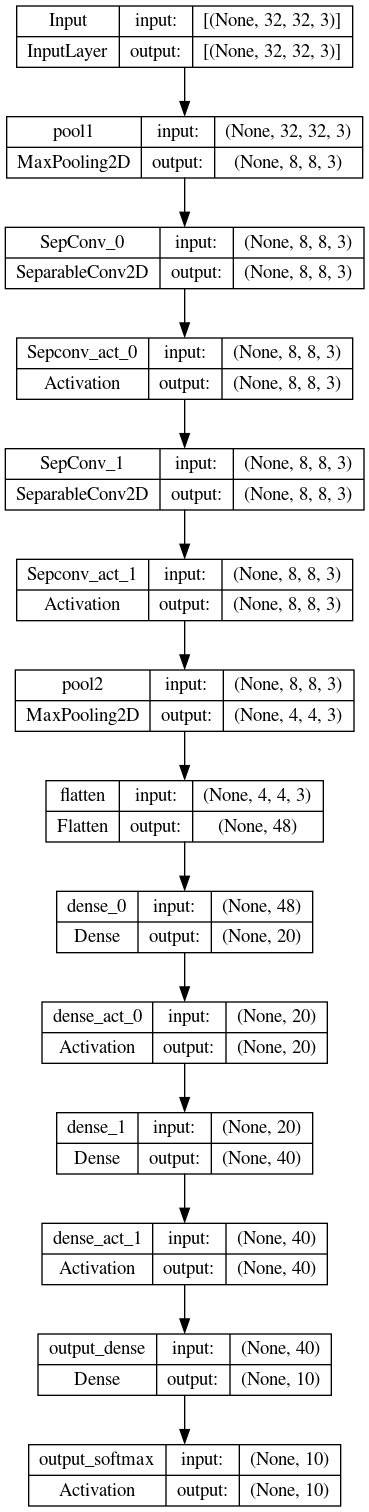

In [21]:
import keras
keras.utils.plot_model(model, to_file="model.png",show_shapes=True, show_layer_activations=False)

In [22]:
import hls4ml.utils
import hls4ml.converters

In [23]:
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
print("-----------------------------------")

Interpreting Model
Topology:
Layer name: Input, layer type: InputLayer, input shapes: [[None, 32, 32, 3]], output shape: [None, 32, 32, 3]
Layer name: pool1, layer type: MaxPooling2D, input shapes: [[None, 32, 32, 3]], output shape: [None, 8, 8, 3]
Layer name: SepConv_0, layer type: SeparableConv2D, input shapes: [[None, 8, 8, 3]], output shape: [None, 8, 8, 3]
Layer name: Sepconv_act_0, layer type: Activation, input shapes: [[None, 8, 8, 3]], output shape: [None, 8, 8, 3]
Layer name: SepConv_1, layer type: SeparableConv2D, input shapes: [[None, 8, 8, 3]], output shape: [None, 8, 8, 3]
Layer name: Sepconv_act_1, layer type: Activation, input shapes: [[None, 8, 8, 3]], output shape: [None, 8, 8, 3]
Layer name: pool2, layer type: MaxPooling2D, input shapes: [[None, 8, 8, 3]], output shape: [None, 4, 4, 3]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 4, 4, 3]], output shape: [None, 48]
Layer name: dense_0, layer type: Dense, input shapes: [[None, 48]], output shape: [No

In [24]:
IO_TYPE = 'io_parallel'
STRATEGY = 'Latency'
BACKEND = 'Vivado'
FXD_W = 12 # Fixed-point precision, word bit width
FXD_I = 11 # Fixed-point precision, integer-part bit width

In [26]:
#config['LayerName']['q_input_1']['Precision']['result'] = 'fixed<{},{}>'.format(FXD_W, FXD_I)
config['LayerName']['Input']['Precision']['result'] = 'fixed<{},{}>'.format(FXD_W, FXD_I)
config['Model']['Strategy'] = STRATEGY
#config['Model']['Strategy'] = 'Resource'

hls_model = hls4ml.converters.convert_from_keras_model(
    model, 
    hls_config=config, 
    output_dir='hls4ml_prj', 
    part='xcu250-figd2104-2L-e',
    backend=BACKEND,
    io_type=IO_TYPE
)

hls_model.compile()

Interpreting Model
Topology:
Layer name: Input, layer type: InputLayer, input shapes: [[None, 32, 32, 3]], output shape: [None, 32, 32, 3]
Layer name: pool1, layer type: MaxPooling2D, input shapes: [[None, 32, 32, 3]], output shape: [None, 8, 8, 3]
Layer name: SepConv_0, layer type: SeparableConv2D, input shapes: [[None, 8, 8, 3]], output shape: [None, 8, 8, 3]
Layer name: Sepconv_act_0, layer type: Activation, input shapes: [[None, 8, 8, 3]], output shape: [None, 8, 8, 3]
Layer name: SepConv_1, layer type: SeparableConv2D, input shapes: [[None, 8, 8, 3]], output shape: [None, 8, 8, 3]
Layer name: Sepconv_act_1, layer type: Activation, input shapes: [[None, 8, 8, 3]], output shape: [None, 8, 8, 3]
Layer name: pool2, layer type: MaxPooling2D, input shapes: [[None, 8, 8, 3]], output shape: [None, 4, 4, 3]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 4, 4, 3]], output shape: [None, 48]
Layer name: dense_0, layer type: Dense, input shapes: [[None, 48]], output shape: [No

In [31]:
hls_model.build(csim=False) #must make the input of Separable 10,10,3


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2020.1 (64-bit)
  **** SW Build 2902540 on Wed May 27 19:54:35 MDT 2020
  **** IP Build 2902112 on Wed May 27 22:43:36 MDT 2020
    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.

source /data/software/xilinx/Vivado/2020.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/data/software/xilinx/Vivado/2020.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'russelld' on host 'mulder.t2.ucsd.edu' (Linux_x86_64 version 4.18.0-425.3.1.el8.x86_64) on Mon Jan 22 14:52:11 PST 2024
INFO: [HLS 200-10] In directory '/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/users/russelld/sConv2D_hls4ml/SepConv2D_hls4ml/hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test be

{}

## Trying Trace

In [30]:
#config['LayerName']['Input']['Trace']=True

In [34]:
weigth = hls_model.trace(x)

Recompiling myproject with tracing
Writing HLS project
Done


In [33]:
x = np.random.rand(10, 3, 32, 32)

(array([[0.        , 0.        , 0.79980469, 0.        , 0.        ,
         0.        , 0.        , 0.20214844, 0.        , 0.        ],
        [0.57128906, 0.11230469, 0.01269531, 0.03320312, 0.06347656,
         0.03320312, 0.11914062, 0.00878906, 0.12695312, 0.04394531],
        [0.57128906, 0.11230469, 0.01269531, 0.03320312, 0.06347656,
         0.03320312, 0.11914062, 0.00878906, 0.12695312, 0.04394531],
        [0.57128906, 0.11230469, 0.01269531, 0.03320312, 0.06347656,
         0.03320312, 0.11914062, 0.00878906, 0.12695312, 0.04394531],
        [0.57128906, 0.11230469, 0.01269531, 0.03320312, 0.06347656,
         0.03320312, 0.11914062, 0.00878906, 0.12695312, 0.04394531],
        [0.57128906, 0.11230469, 0.01269531, 0.03320312, 0.06347656,
         0.03320312, 0.11914062, 0.00878906, 0.12695312, 0.04394531],
        [0.57128906, 0.11230469, 0.01269531, 0.03320312, 0.06347656,
         0.03320312, 0.11914062, 0.00878906, 0.12695312, 0.04394531],
        [0.57128906, 0.1123